<h2 align=center>Exploratory Data Analysis on Breast Cancer Wisconsin (Diagnostic) Data Set</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-card.jpg">


### About the Dataset:

Abstract: Diagnostic Wisconsin Breast Cancer Database

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.
The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/)

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Loading Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/data.csv')

### Exploring the characteristics of its Attributes and Instances

In [3]:
print(data.sample(10), '\n', '*'*50)
print(data.columns,  '\n','*'*50)
print(data.shape,  '\n','*'*50)
print(data.info(), '\n', '*'*50)
print(data.describe(), '\n', '*'*50)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
81    8611161         B        13.34         15.86           86.49      520.0   
265  88995002         M        20.73         31.12          135.70     1419.0   
220   8812816         B        13.65         13.16           87.88      568.9   
517    916838         M        19.89         20.26          130.50     1214.0   
542    921644         B        14.74         25.42           94.70      668.6   
454    911202         B        12.62         17.15           80.62      492.9   
269   8910720         B        10.71         20.39           69.50      344.9   
219  88119002         M        19.53         32.47          128.00     1223.0   
274   8911163         M        17.93         24.48          115.20      998.9   
9    84501001         M        12.46         24.04           83.97      475.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
81           0.10780         

### Preparing Data for Analysis

**id** cannot be used for classificaiton.<br>
**diagnosis** is our target variable.<br>
**Unnamed: 32** feature includes NaN so we do not need it.<br>

In [4]:
target = data.diagnosis
id_n = data.id
data = data.drop(['Unnamed: 32','id'],axis = 1 )
feat = data.drop(['diagnosis'],axis = 1 )
feat.sample(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
109,11.340,21.26,72.48,396.5,0.08759,0.06575,0.051330,0.01899,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.16990,0.21960,0.31200,0.08278,0.2829,0.08832
405,10.940,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.02932,0.1486,0.06615,...,12.40,25.58,82.76,472.4,0.13630,0.16440,0.14120,0.07887,0.2251,0.07732
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.118800,0.07038,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.20060,0.36630,0.29130,0.10750,0.2848,0.13640
368,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.08465,0.1717,0.05054,...,30.75,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
226,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269
371,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,...,14.16,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for b in feat.columns:
     scaler.fit(feat[[b]])
     feat[b] = scaler.transform(feat[[b]])

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(data['diagnosis'].values))
data['diagnosis'] = lbl.transform(list(data['diagnosis'].values))

### Calculating the Correlation Matrix

In [12]:
corrmat = data.corr()
cols = corrmat.nlargest(11, 'diagnosis')['diagnosis'].index

### Plotting Target Variable and Top 10 Features Correlated to it

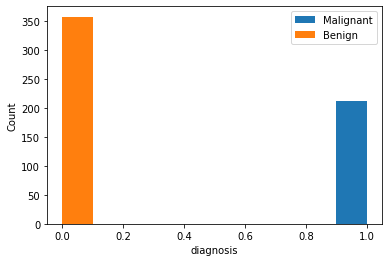

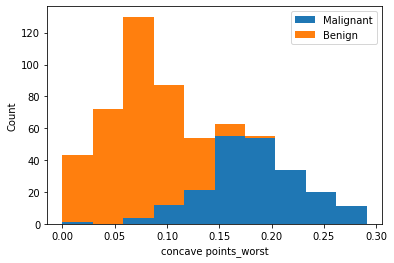

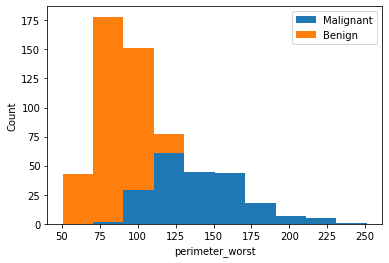

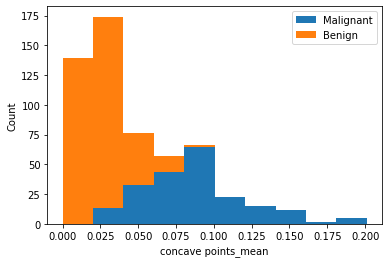

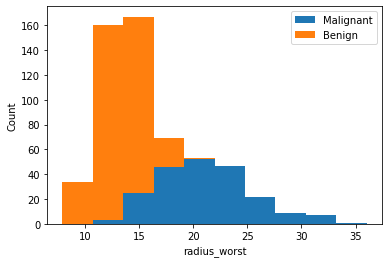

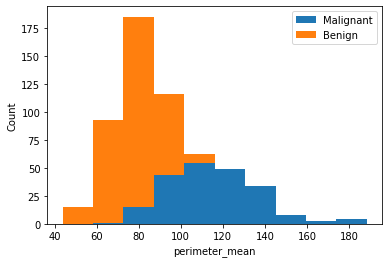

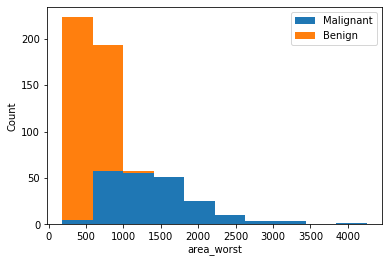

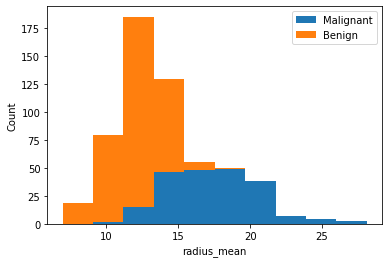

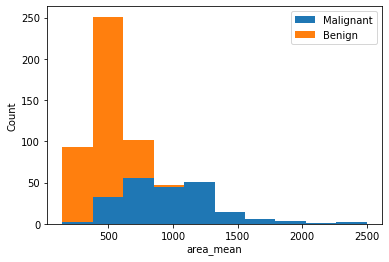

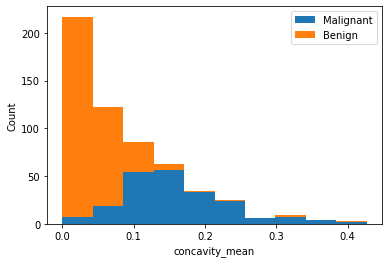

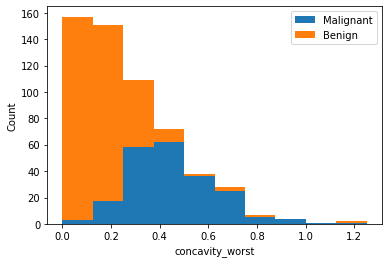

<Figure size 432x288 with 0 Axes>

In [8]:
for i in cols:
    plt.hist(x = [data[data['diagnosis']==1][i], data[data['diagnosis']==0][i]],stacked=True,label = ['Malignant','Benign'])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    plt.figure()

### Pair Plots of Top 10 Features Correlated to Target Variable

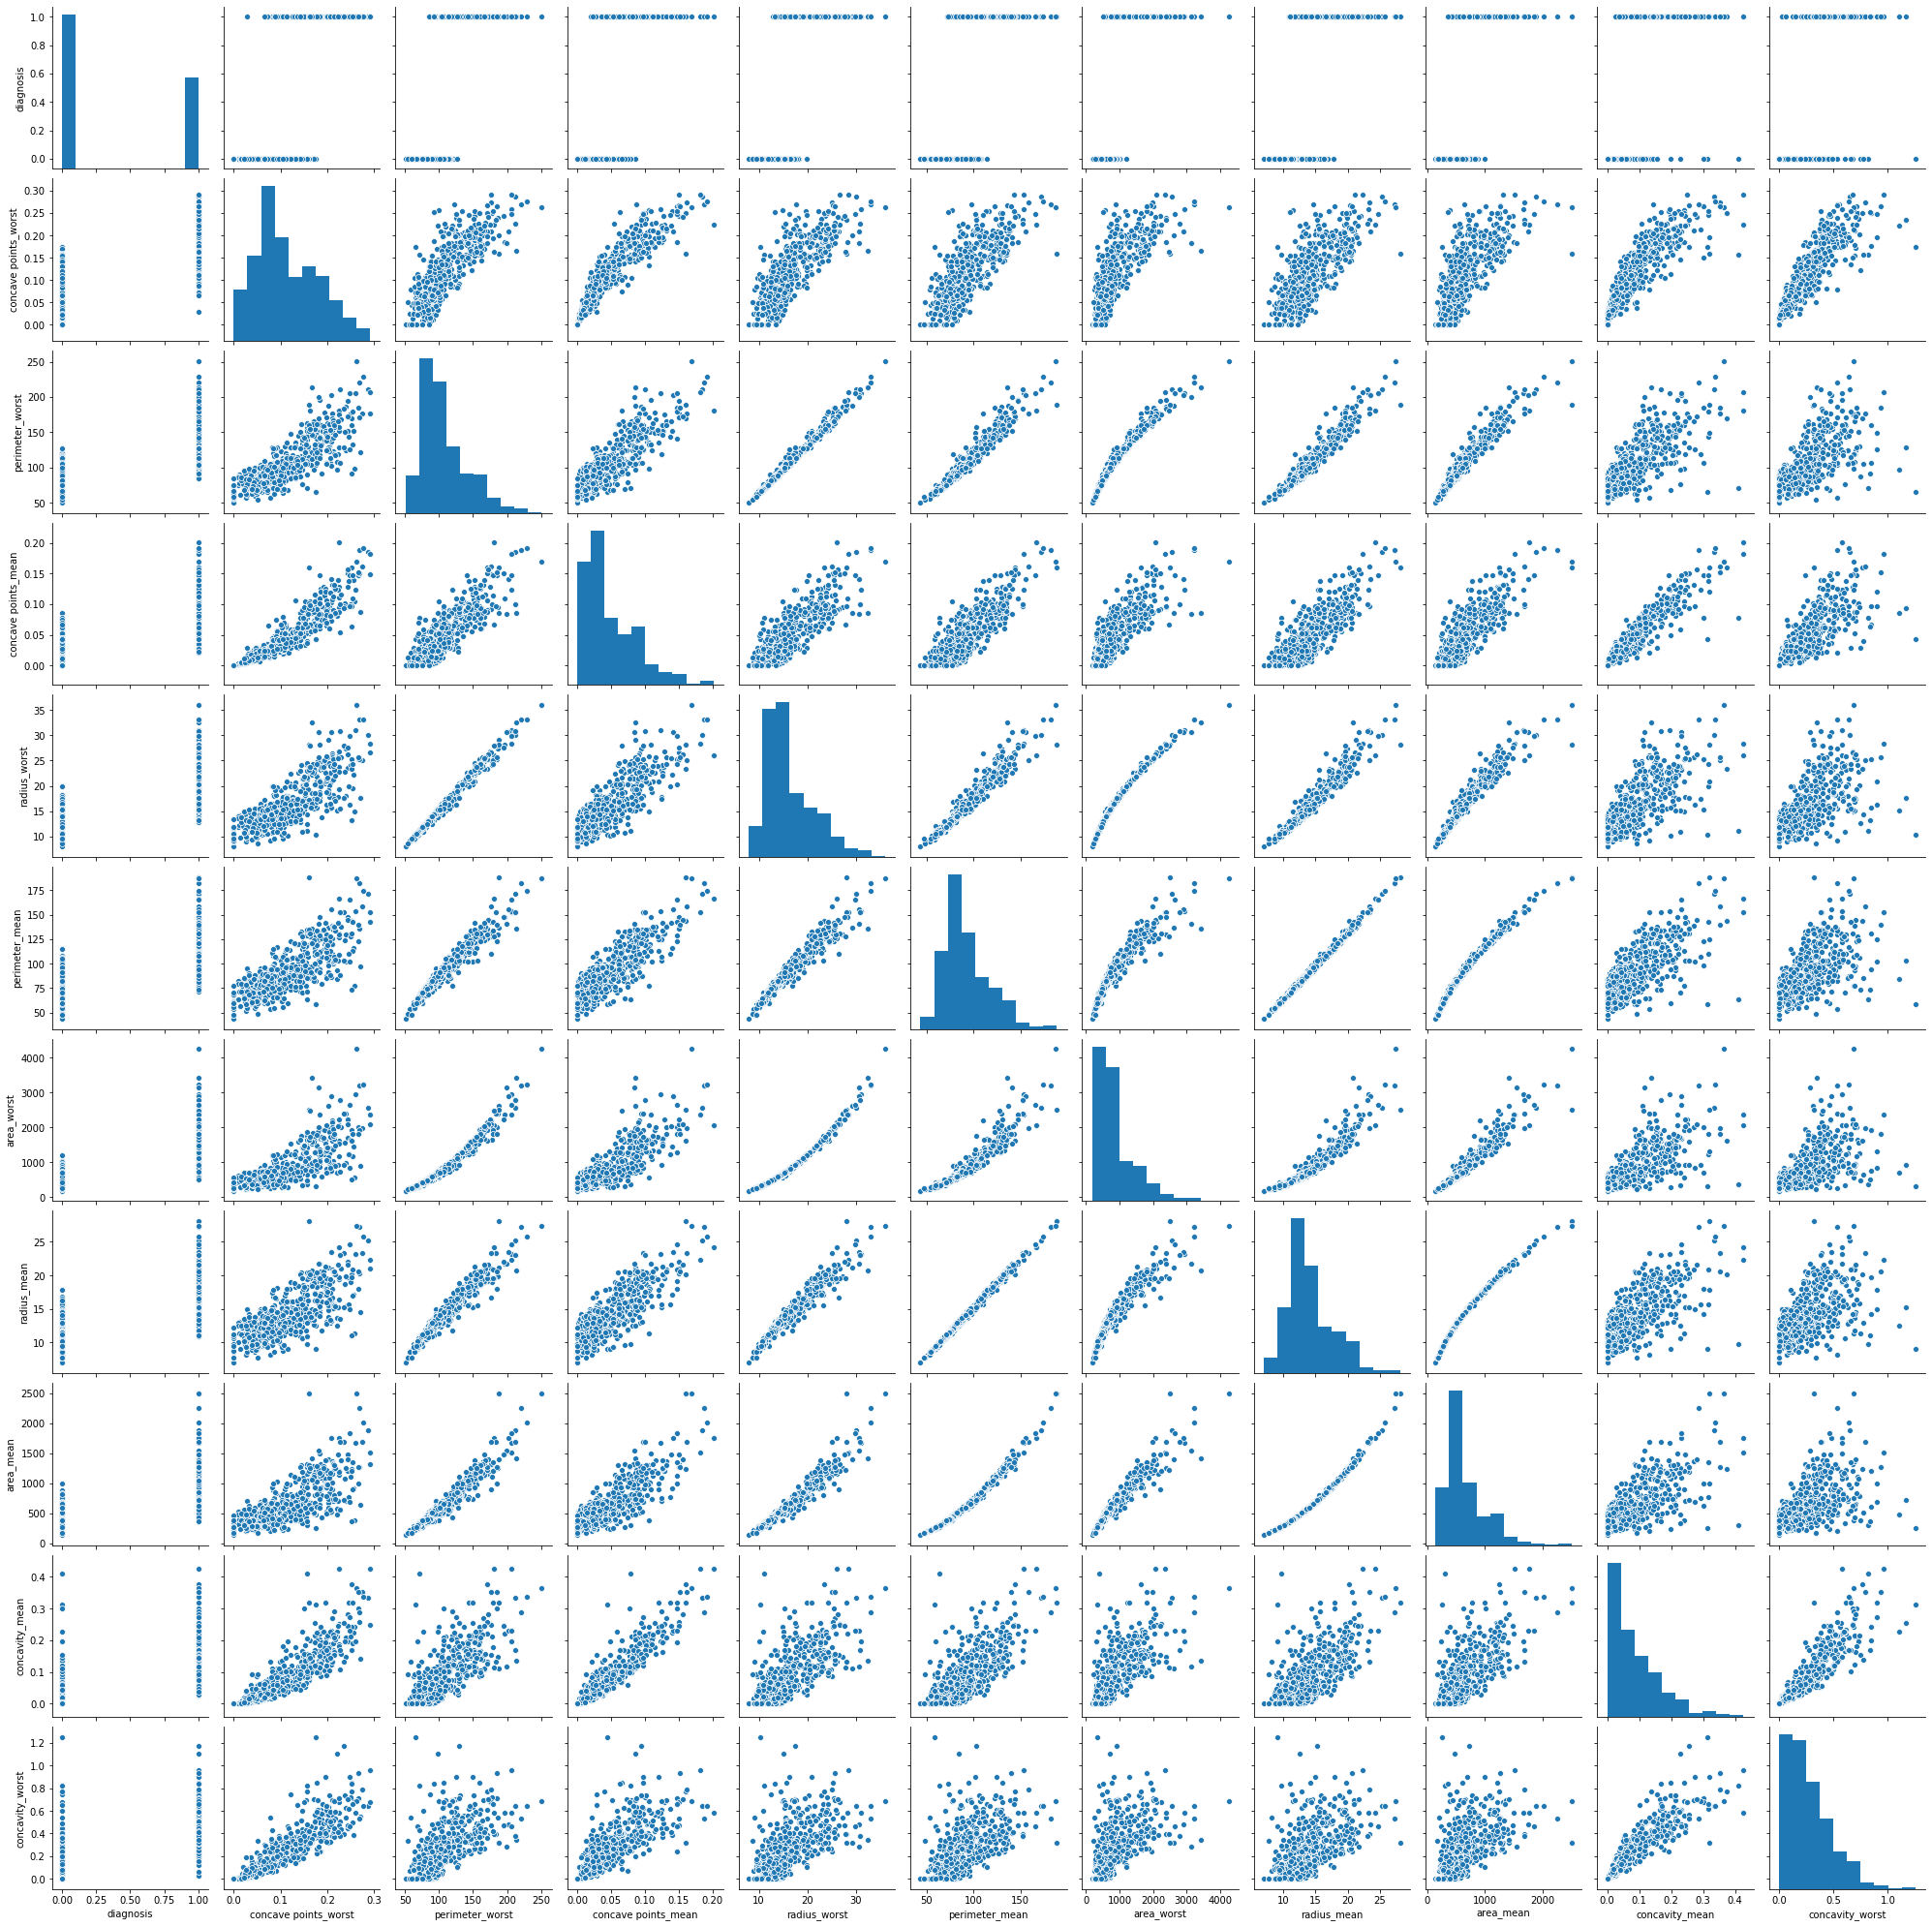

In [9]:
_ = sns.pairplot(data[cols],kind='scatter', diag_kind='auto', height=2.5, aspect=1, corner=False)

### Box Plots of features

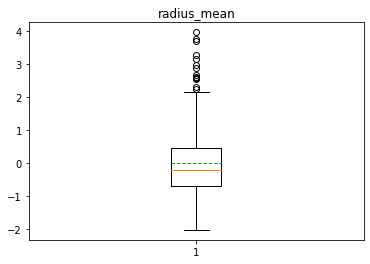

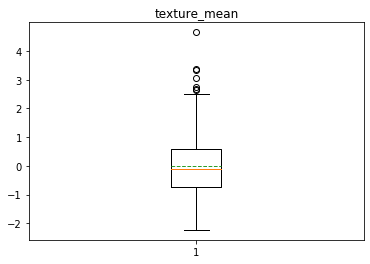

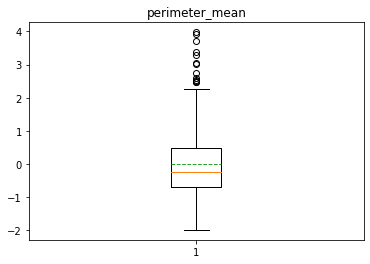

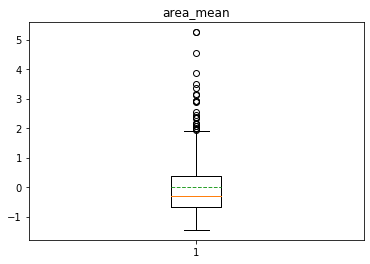

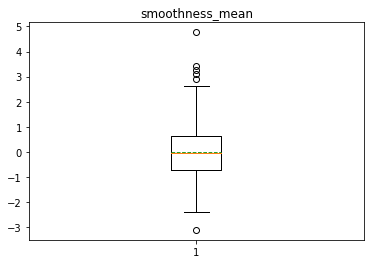

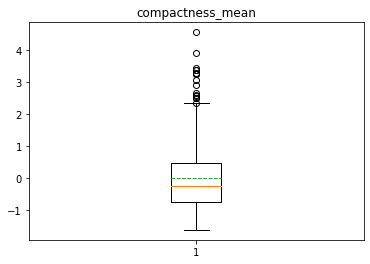

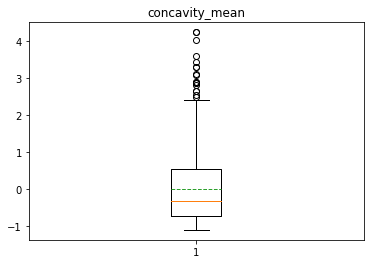

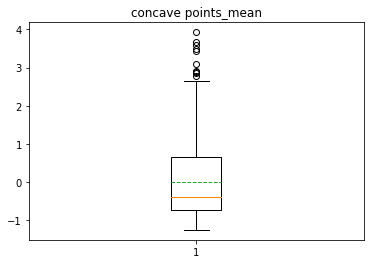

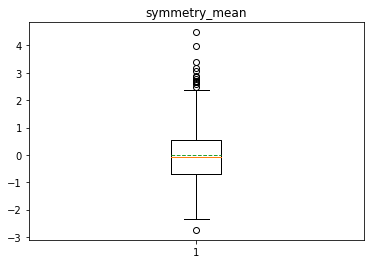

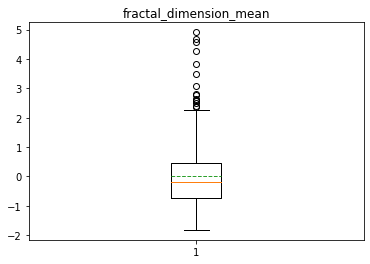

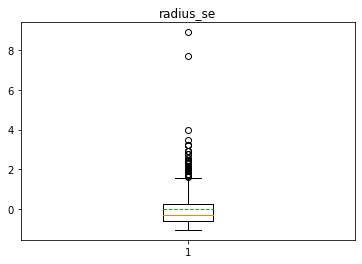

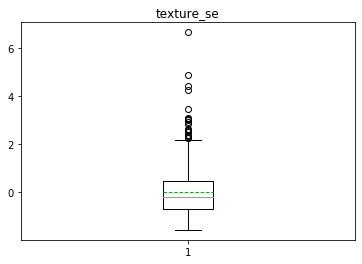

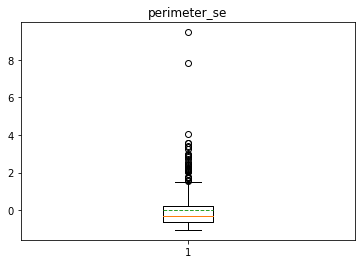

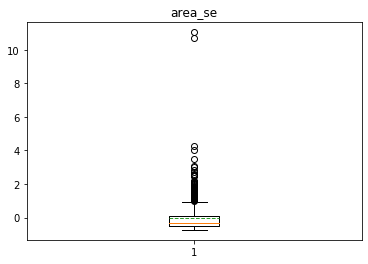

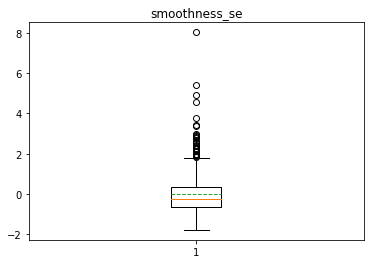

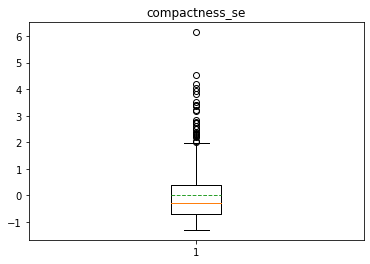

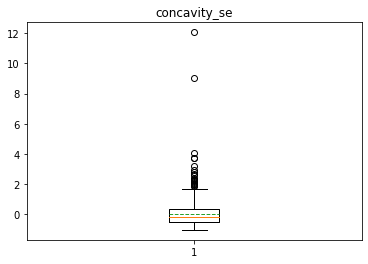

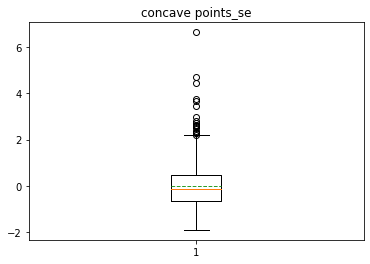

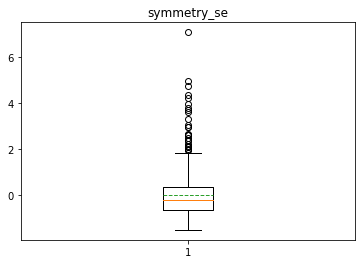

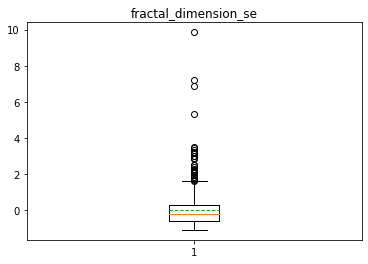

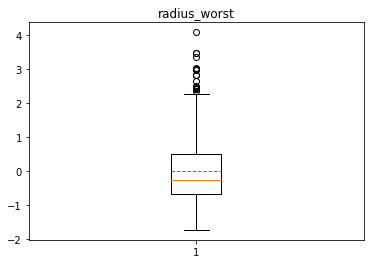

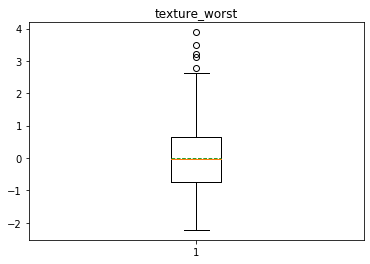

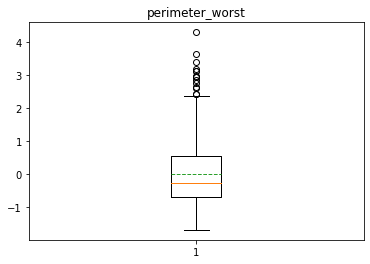

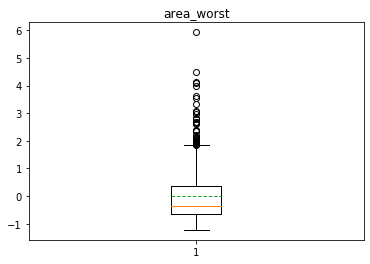

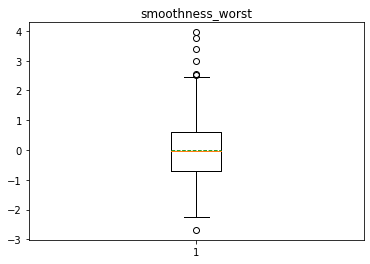

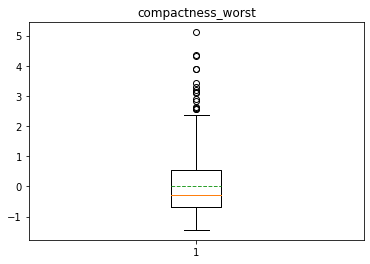

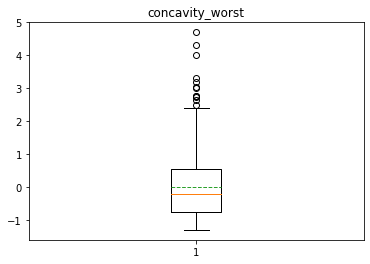

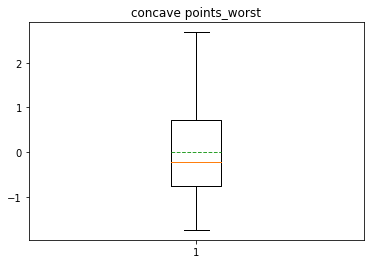

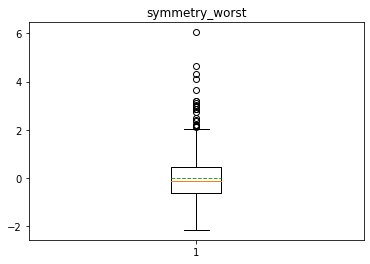

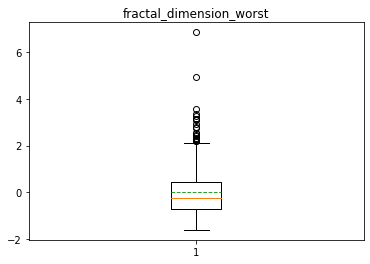

<Figure size 432x288 with 0 Axes>

In [10]:
for i in feat.columns:
    plt.boxplot(feat[i], showmeans = True, meanline = True)
    plt.title(i)
    plt.show()
    plt.figure()

### Observing all Features Correlations with Heatmap

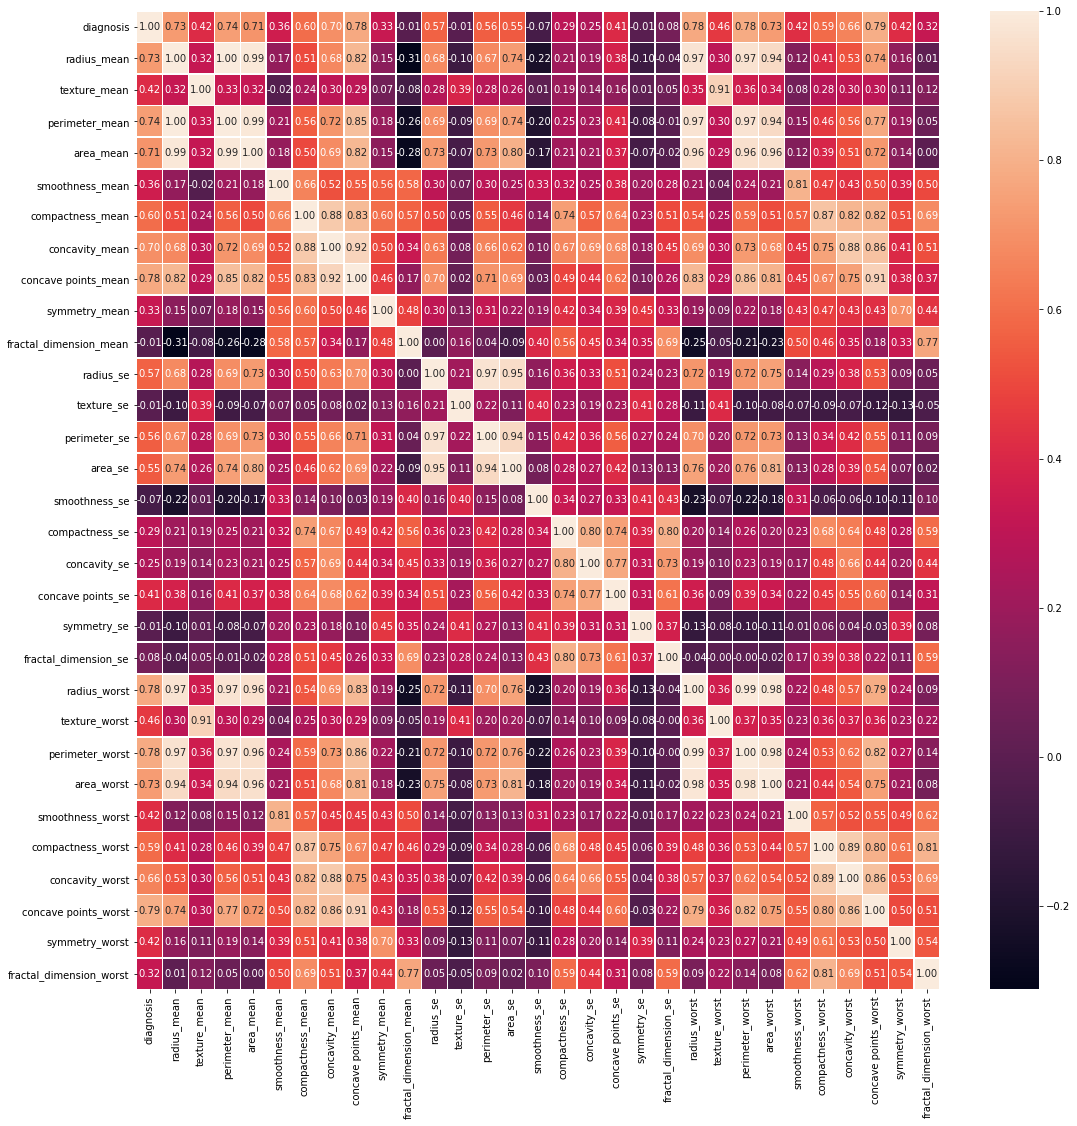

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.2f',ax=ax);